In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### train dataset cleaning and preprocessing

taken from adult.data
Data is already split into train-test using MLC++ GenCVFiles (2/3, 1/3 random). (as per the documentation)

In [2]:
# Loading the training data
traindf = pd.read_csv("adult/adult.data", index_col=False, names=['age','workclass','fnlwgt',
                                                                'education','education-num',
                                                                'marital-status','occupation',
                                                                'relationship','race','sex',
                                                                'capital-gain','capital-loss',
                                                                'hours-per-week','native-country','income'])

traindf.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
traindf.shape

(32561, 15)

In [4]:
traindf.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


fnlwgt (final weight) is discrete and thus it is not useful. And since education number is there education is not needed either.

In [5]:
traindf=traindf.drop(['education', 'fnlwgt'], axis = 1)
traindf.head()

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [6]:
traindf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   education-num   32561 non-null  int64 
 3   marital-status  32561 non-null  object
 4   occupation      32561 non-null  object
 5   relationship    32561 non-null  object
 6   race            32561 non-null  object
 7   sex             32561 non-null  object
 8   capital-gain    32561 non-null  int64 
 9   capital-loss    32561 non-null  int64 
 10  hours-per-week  32561 non-null  int64 
 11  native-country  32561 non-null  object
 12  income          32561 non-null  object
dtypes: int64(5), object(8)
memory usage: 3.2+ MB


Even though it shows there are no null values, some are available in the form of '?'. Replace them with NaN

In [7]:
traindf.replace(" ?",np.NaN,inplace=True)
traindf.head(20)
# Line 14 changed

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


Replace NaN values using ffill

In [8]:
traindf.ffill(inplace = True)
traindf.head(20)

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


Label encoding

In [9]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# convert the string data into labels
traindf['workclass'] = le.fit_transform(traindf['workclass'])
traindf['marital-status'] = le.fit_transform(traindf['marital-status'])
traindf['occupation'] = le.fit_transform(traindf['occupation'])
traindf['relationship'] = le.fit_transform(traindf['relationship'])
traindf['race'] = le.fit_transform(traindf['race'])
traindf['sex'] = le.fit_transform(traindf['sex'])
traindf['native-country'] = le.fit_transform(traindf['native-country'])
traindf['income'] = le.fit_transform(traindf['income'])

traindf.head()

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,6,13,4,0,1,4,1,2174,0,40,38,0
1,50,5,13,2,3,0,4,1,0,0,13,38,0
2,38,3,9,0,5,1,4,1,0,0,40,38,0
3,53,3,7,2,5,0,2,1,0,0,40,38,0
4,28,3,13,2,9,5,2,0,0,0,40,4,0


In [10]:
# sns.pairplot(traindf, hue = 'income', corner=True)

<Axes: >

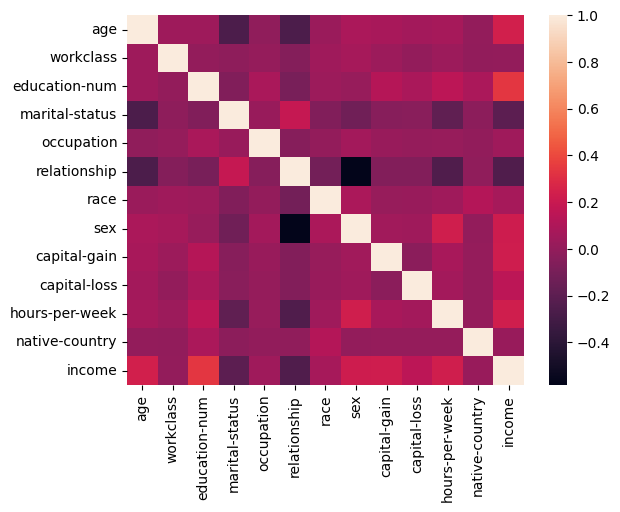

In [11]:
sns.heatmap(traindf.corr())

In [12]:
# splitting x and y
x_train=traindf.drop(['income'], axis = 1)
y_train=traindf['income']

### test dataset cleaning and preprocessing. 

Taken from adult.test

In [13]:
testdf = pd.read_csv("adult/adult.test", header=0, index_col=False, names=['age','workclass','fnlwgt',
                                                                        'education','education-num',
                                                                        'marital-status','occupation',
                                                                        'relationship','race','sex',
                                                                        'capital-gain','capital-loss',
                                                                        'hours-per-week','native-country','income'])

testdf.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [14]:
testdf.shape

(16281, 15)

In [15]:
testdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16281 entries, 0 to 16280
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             16281 non-null  int64 
 1   workclass       16281 non-null  object
 2   fnlwgt          16281 non-null  int64 
 3   education       16281 non-null  object
 4   education-num   16281 non-null  int64 
 5   marital-status  16281 non-null  object
 6   occupation      16281 non-null  object
 7   relationship    16281 non-null  object
 8   race            16281 non-null  object
 9   sex             16281 non-null  object
 10  capital-gain    16281 non-null  int64 
 11  capital-loss    16281 non-null  int64 
 12  hours-per-week  16281 non-null  int64 
 13  native-country  16281 non-null  object
 14  income          16281 non-null  object
dtypes: int64(6), object(9)
memory usage: 1.9+ MB


In [16]:
# perform the same cleaning process from train dataset
testdf=testdf.drop(['education', 'fnlwgt'], axis = 1)
testdf.replace(" ?",np.NaN,inplace=True)
testdf.ffill(inplace = True)

testdf.head()

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,Private,10,Never-married,Machine-op-inspct,Own-child,White,Female,0,0,30,United-States,<=50K.


Label encoding

In [17]:
testdf['workclass'] = le.fit_transform(testdf['workclass'])
testdf['marital-status'] = le.fit_transform(testdf['marital-status'])
testdf['occupation'] = le.fit_transform(testdf['occupation'])
testdf['relationship'] = le.fit_transform(testdf['relationship'])
testdf['race'] = le.fit_transform(testdf['race'])
testdf['sex'] = le.fit_transform(testdf['sex'])
testdf['native-country'] = le.fit_transform(testdf['native-country'])
testdf['income'] = le.fit_transform(testdf['income'])

testdf.head()

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,3,7,4,6,3,2,1,0,0,40,37,0
1,38,3,9,2,4,0,4,1,0,0,50,37,0
2,28,1,12,2,10,0,4,1,0,0,40,37,1
3,44,3,10,2,6,0,2,1,7688,0,40,37,1
4,18,3,10,4,6,3,4,0,0,0,30,37,0


In [18]:
# splitting x and y
x_test=testdf.drop(['income'], axis = 1)
y_test=testdf['income']

### Naive Bayes Model

In [19]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(x_train,y_train)

GaussianNB()

Check Metrics

In [20]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

y_pred_gnb = gnb.predict(x_test)
print(classification_report(y_test,y_pred_gnb))
print(confusion_matrix(y_test,y_pred_gnb))
print(f'accuracy: {accuracy_score(y_test,y_pred_gnb)*100}')

              precision    recall  f1-score   support

           0       0.82      0.95      0.88     12435
           1       0.66      0.32      0.43      3846

    accuracy                           0.80     16281
   macro avg       0.74      0.63      0.65     16281
weighted avg       0.78      0.80      0.77     16281

[[11819   616]
 [ 2624  1222]]
accuracy: 80.09950248756219


### Random Forest Model

Model Tuning

In [24]:
from sklearn.model_selection import KFold,GridSearchCV
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier(random_state=9)

kfold = KFold(n_splits=5)
grid_cv = GridSearchCV(estimator=rf, 
                        param_grid={"n_estimators"  : [25,50,100,150,200] ,
                                    "max_features"  : [1,2,3,4,5]}, 
                        scoring='accuracy',
                        cv=kfold)
gres=grid_cv.fit(x_train, y_train)

print(f"Best    : {gres.best_score_}")
print(f"Params  : {gres.best_params_}")

Best    : 0.8522159046111142
Params  : {'max_features': 2, 'n_estimators': 200}


In [27]:
tuned_rf=gres.best_estimator_
tuned_rf.fit(x_train,y_train)

RandomForestClassifier(max_features=2, n_estimators=200, random_state=9)

Check Metrics

In [28]:
y_pred_rf = tuned_rf.predict(x_test)
print(classification_report(y_test,y_pred_rf))
print(confusion_matrix(y_test,y_pred_rf))
print(f'accuracy: {accuracy_score(y_test,y_pred_rf)*100}')

              precision    recall  f1-score   support

           0       0.88      0.93      0.91     12435
           1       0.72      0.60      0.66      3846

    accuracy                           0.85     16281
   macro avg       0.80      0.77      0.78     16281
weighted avg       0.85      0.85      0.85     16281

[[11538   897]
 [ 1522  2324]]
accuracy: 85.14219028315215
